<a href="https://colab.research.google.com/github/Abishek-Subramaniam/Hypothesis-Testing/blob/main/yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 41.9MB/s]


In [ ]:
df=pd.read_csv('bike_sharing.csv')
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
# to check the number of null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

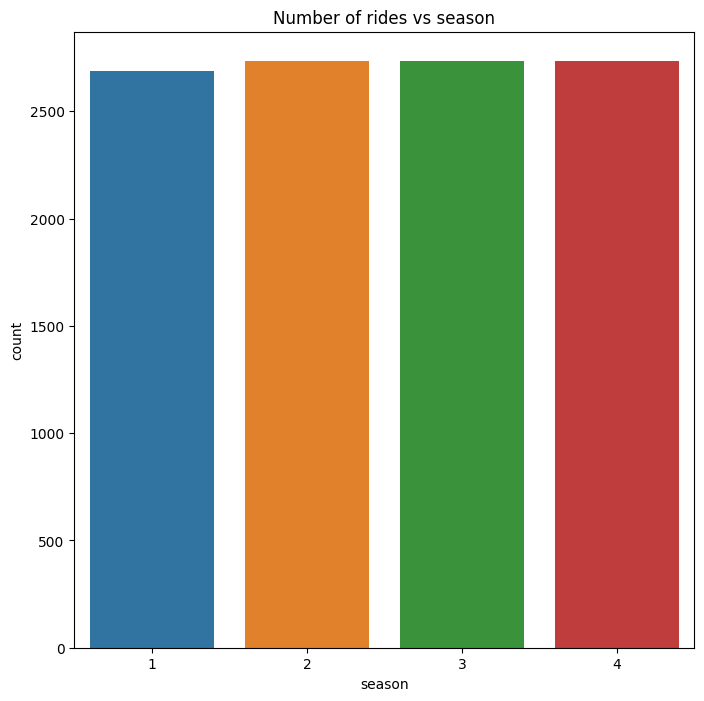

In [ ]:
#univariate analysis
plt.figure(figsize=(8, 8))
sns.countplot(data=df,x='season',hue= 'season' , palette='tab10', legend= False)

plt.title("Number of rides vs season")

plt.show()

In [ ]:
df["season"].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

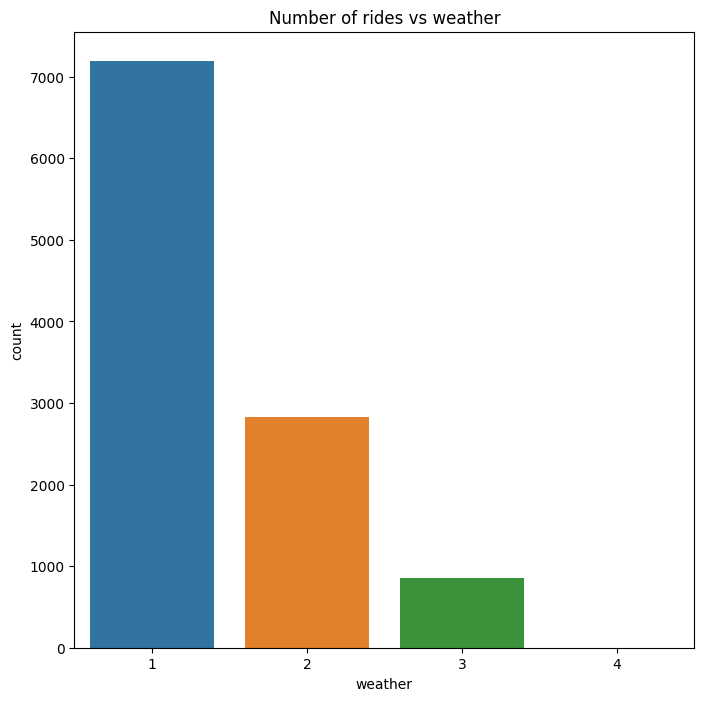

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df,x='weather',hue= 'weather' , palette='tab10', legend= False)

plt.title("Number of rides vs weather")

plt.show()

In [ ]:
df["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

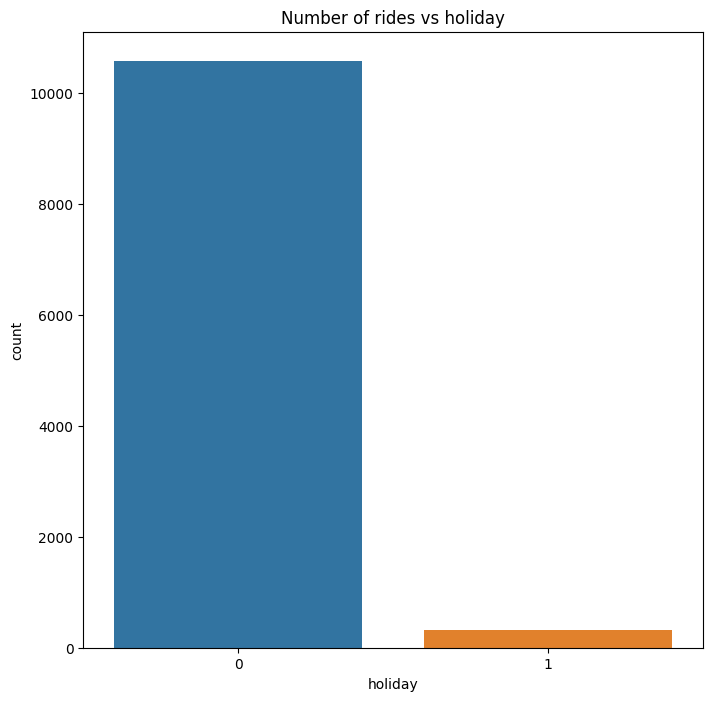

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df,x='holiday',hue= 'holiday' , palette='tab10', legend= False)

plt.title("Number of rides vs holiday")

plt.show()

In [ ]:
df["holiday"].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

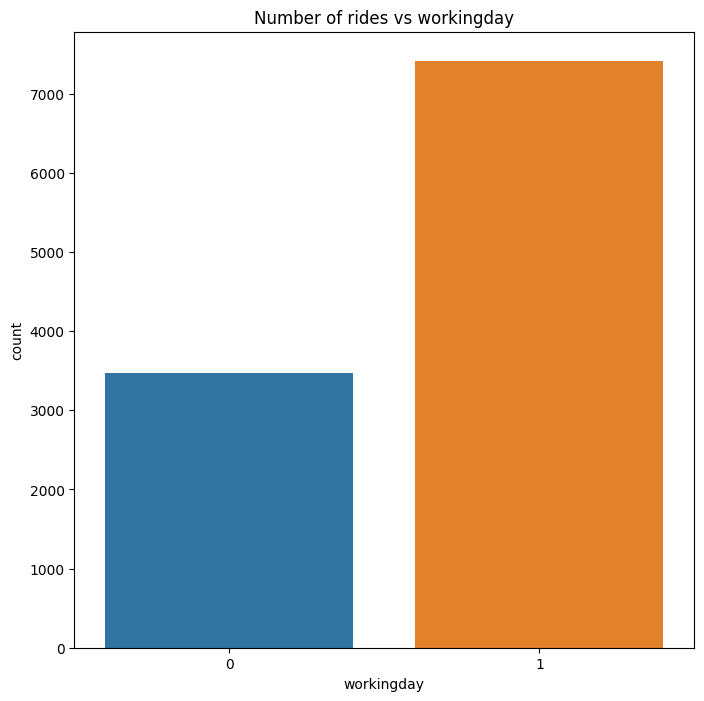

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df,x='workingday',hue= 'workingday' , palette='tab10', legend= False)

plt.title("Number of rides vs workingday")

plt.show()

In [ ]:
df["workingday"].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


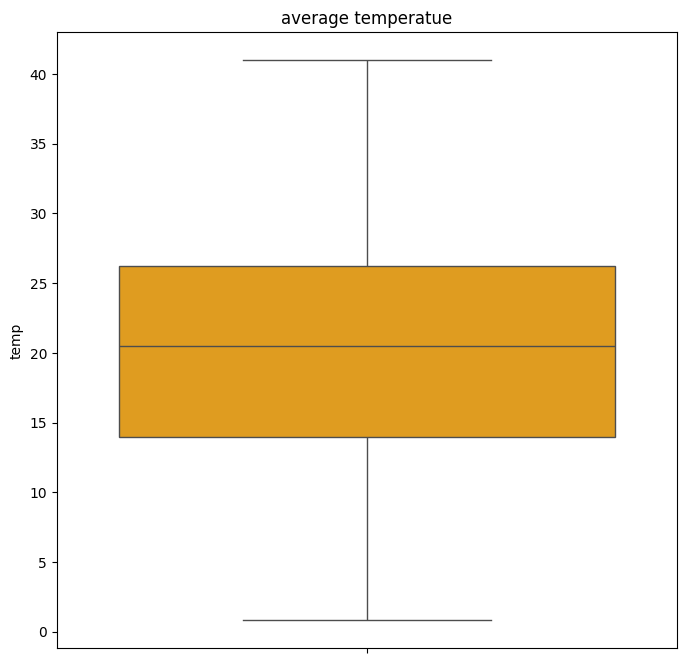

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df,y='temp',color='orange')

plt.title("average temperatue")

plt.show()

In [ ]:
df['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

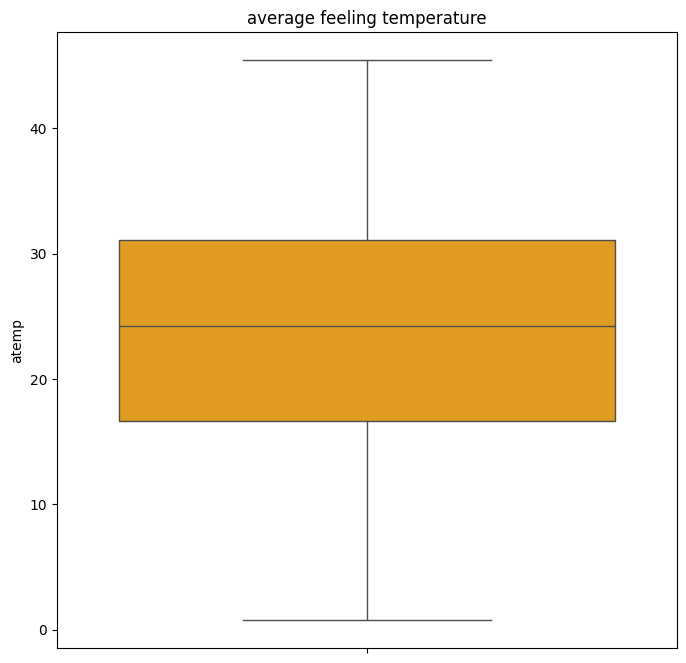

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df,y='atemp',color='orange')

plt.title("average feeling temperature")

plt.show()

In [ ]:
df['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

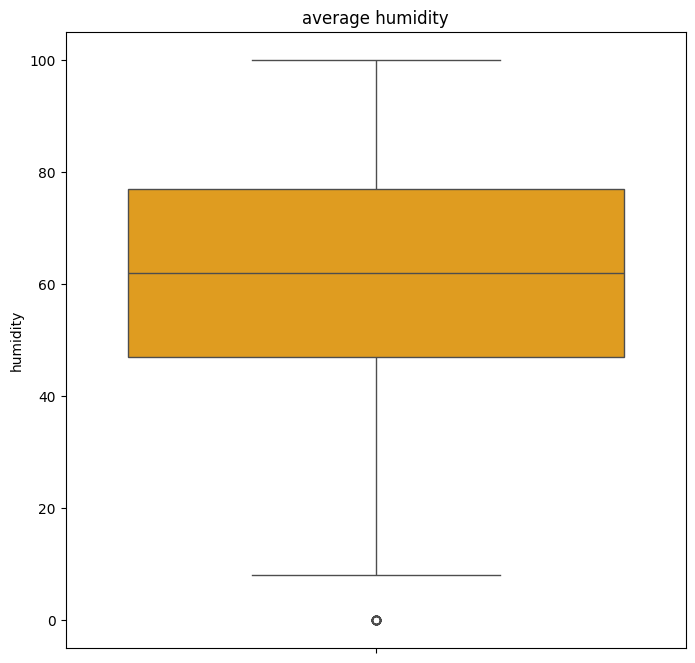

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df,y='humidity',color='orange')

plt.title("average humidity")

plt.show()

In [ ]:
df['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

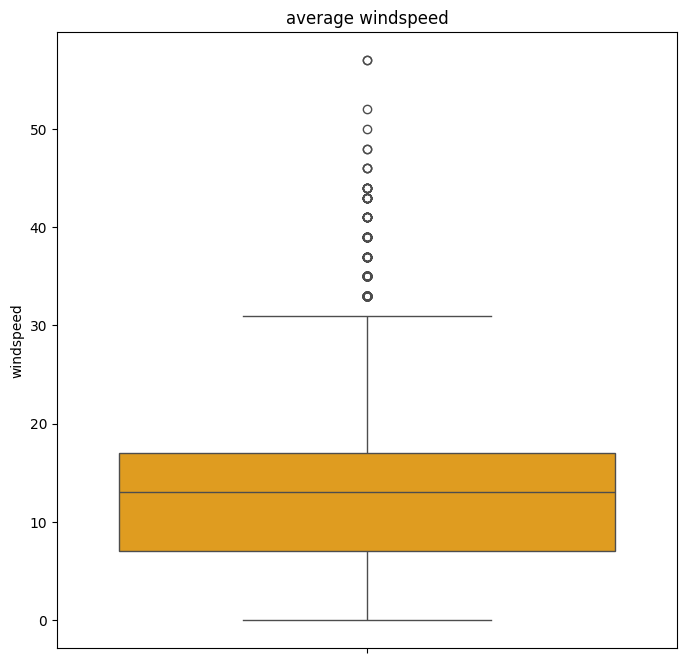

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df,y='windspeed',color='orange')

plt.title("average windspeed")

plt.show()

In [ ]:
df['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

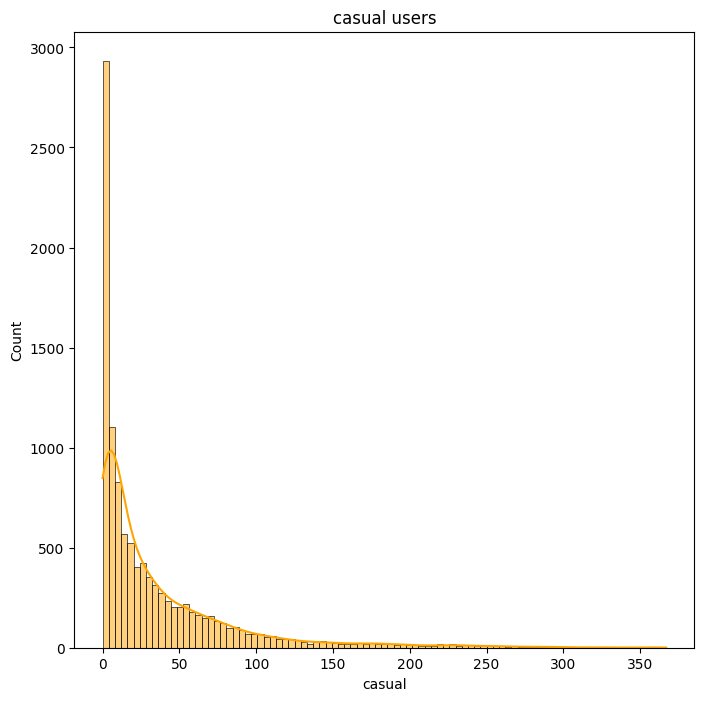

In [ ]:
plt.figure(figsize=(8, 8))
sns.histplot(data=df,x='casual',color='orange',kde=True)

plt.title("casual users")

plt.show()

In [ ]:
df['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

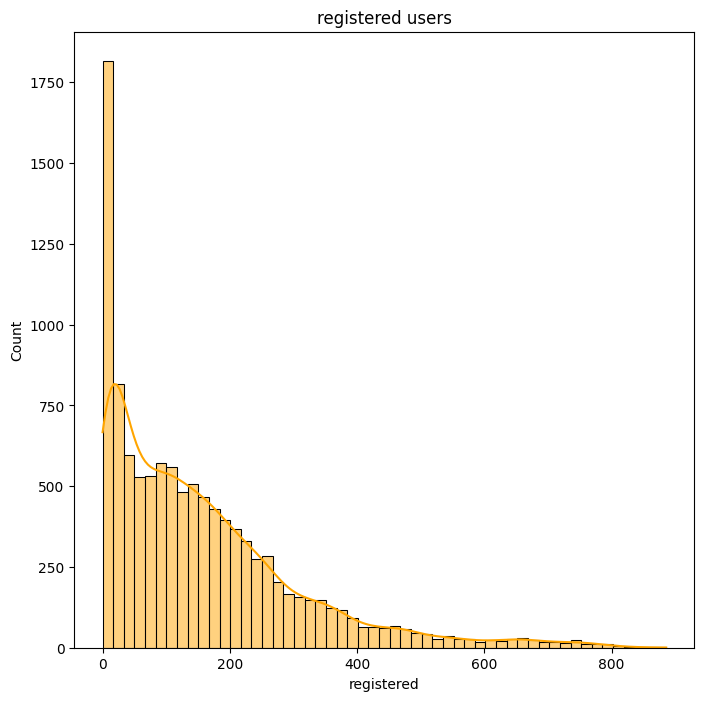

In [ ]:
plt.figure(figsize=(8, 8))
sns.histplot(data=df,x='registered',color='orange',kde=True)

plt.title("registered users")

plt.show()

In [ ]:
df['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

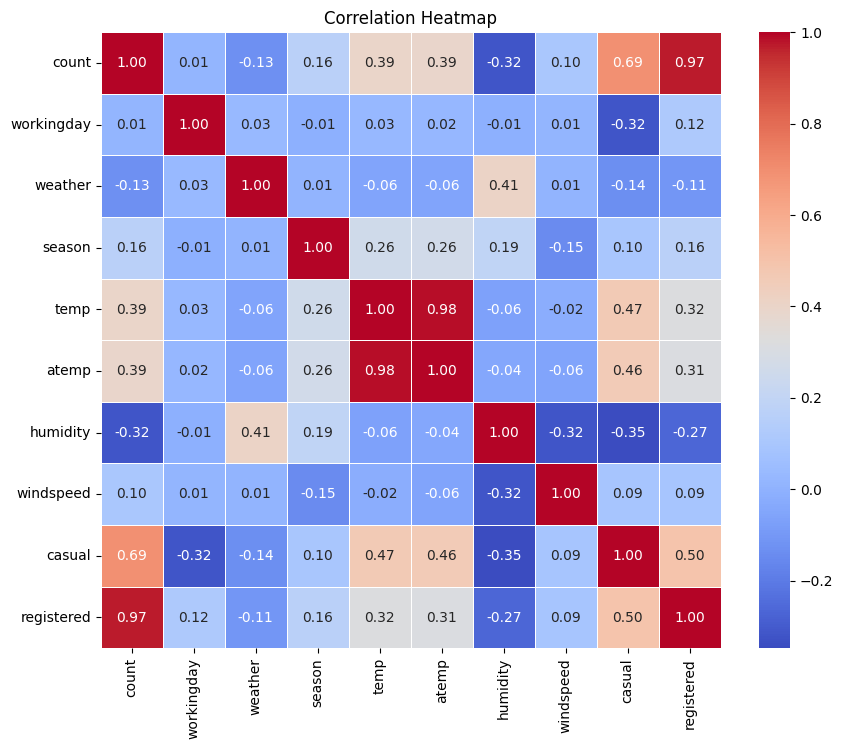

In [ ]:
corr_matrix = df[['count', 'workingday', 'weather', 'season', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_matrix.head(10)

,count,workingday,weather,season,temp,atemp,humidity,windspeed,casual,registered
count,1.000000,0.011594,-0.128655,0.163439,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948
workingday,0.011594,1.000000,0.033772,-0.008126,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460
weather,-0.128655,0.033772,1.000000,0.008879,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340
season,0.163439,-0.008126,0.008879,1.000000,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011
temp,0.394454,0.029966,-0.055035,0.258689,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571
atemp,0.389784,0.024660,-0.055376,0.264744,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635
humidity,-0.317371,-0.010880,0.406244,0.190610,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458
windspeed,0.101369,0.013373,0.007261,-0.147121,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052
casual,0.690414,-0.319111,-0.135918,0.096758,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250
registered,0.970948,0.119460,-0.109340,0.164011,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000


#Checking if there any significant difference between the no. of bike rides on Weekdays and Weekends?

In [ ]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [ ]:
weekend = df[df['workingday'] == 1]['count']
weekday = df[df['workingday'] == 0]['count']

In [ ]:
weekend.shape

(7412,)

In [ ]:
np.mean(weekday)

188.50662061024755

In [ ]:
np.mean(weekend)

193.01187263896384

H0= There is **significant difference** between the no. of bike rides on weekends and weekdays.

Ha= There is **no significant difference** between the no. of bike rides on weekends and weekdays.

significant level (alpha)= 0.05 (95% confidence level)

In [ ]:
#using twao sample t test independent

from scipy.stats import ttest_ind

t_stat, pvalue = ttest_ind(weekday, weekend, alternative='two-sided')
t_stat, pvalue

(-1.2096277376026694, 0.22644804226361348)

In [ ]:
print("p_value:" , pvalue)

alpha=0.05

if pvalue <= alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

p_value: 0.22644804226361348
Fail to Reject H0


In [ ]:
print("Total number of rides in weekdays :", np.sum(weekday))
print("Total number of rides in weekends :", np.sum(weekend))

Total number of rides in weekdays : 654872
Total number of rides in weekends : 1430604


There is **significant difference** between the no. of bike rides on weekends and weekdays.

From given data we can see that ,

Total number of rides in **weekdays** : **654872**

Total number of rides in **weekends** : **1430604**

The average number of ride on **weekend is 193.01 and weekdays is 188.5** rides.

#Checking if the demand of bicycles on rent is the same for different Weather conditions?

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
# to handle multiple groups we can use one way anova

from scipy.stats import f_oneway

clear_days=df[df['weather']==1]['count']
cold_days=df[df['weather']==2]['count']
rain_days=df[df['weather']==3]['count']
heavyrain_days=df[df['weather']==4]['count']

In [ ]:
np.mean(clear_days)

205.23679087875416

In [ ]:
np.mean(cold_days)

178.95553987297106

In [ ]:
np.mean(rain_days)

118.84633294528521

In [ ]:
np.mean(heavyrain_days)

164.0

In [ ]:
print("Total number of rides in Clear days :", np.sum(clear_days))
print("Total number of rides in Cold days :", np.sum(cold_days))
print("Total number of rides in rain days :", np.sum(rain_days))
print("Total number of rides in heavy rain days :", np.sum(heavyrain_days))

Total number of rides in Clear days : 1476063
Total number of rides in Cold days : 507160
Total number of rides in rain days : 102089
Total number of rides in heavy rain days : 164


## As wee can see that on heavy rainy days we have only 164 rides so, neglecting heavy rain days (weather condition 4)

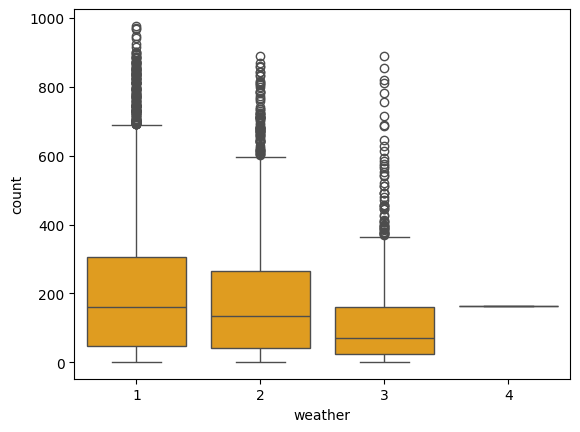

In [ ]:
#### Let's apply One-way ANOVA to see if there is a relation between `count` and `weather' features

sns.boxplot(x='weather', y='count', data=df, color='orange')

plt.show()

we can see that there are numerous outliers in every weather conditions also have different mean (average) number of rides for different weather conditions.

In [ ]:
#one way anova test

f_stats, p_value = f_oneway(clear_days, cold_days, rain_days)

print("test statistic:",f_stats)
print("p_value:",p_value)

if p_value < 0.05:
    print("Reject null hypothesis: There are significant differences in demand for bicycles among different weather conditions.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in demand for bicycles among different weather conditions.")

test statistic: 98.28356881946706
p_value: 4.976448509904196e-43
Reject null hypothesis: There are significant differences in demand for bicycles among different weather conditions.


 ## Assumptions of Anova

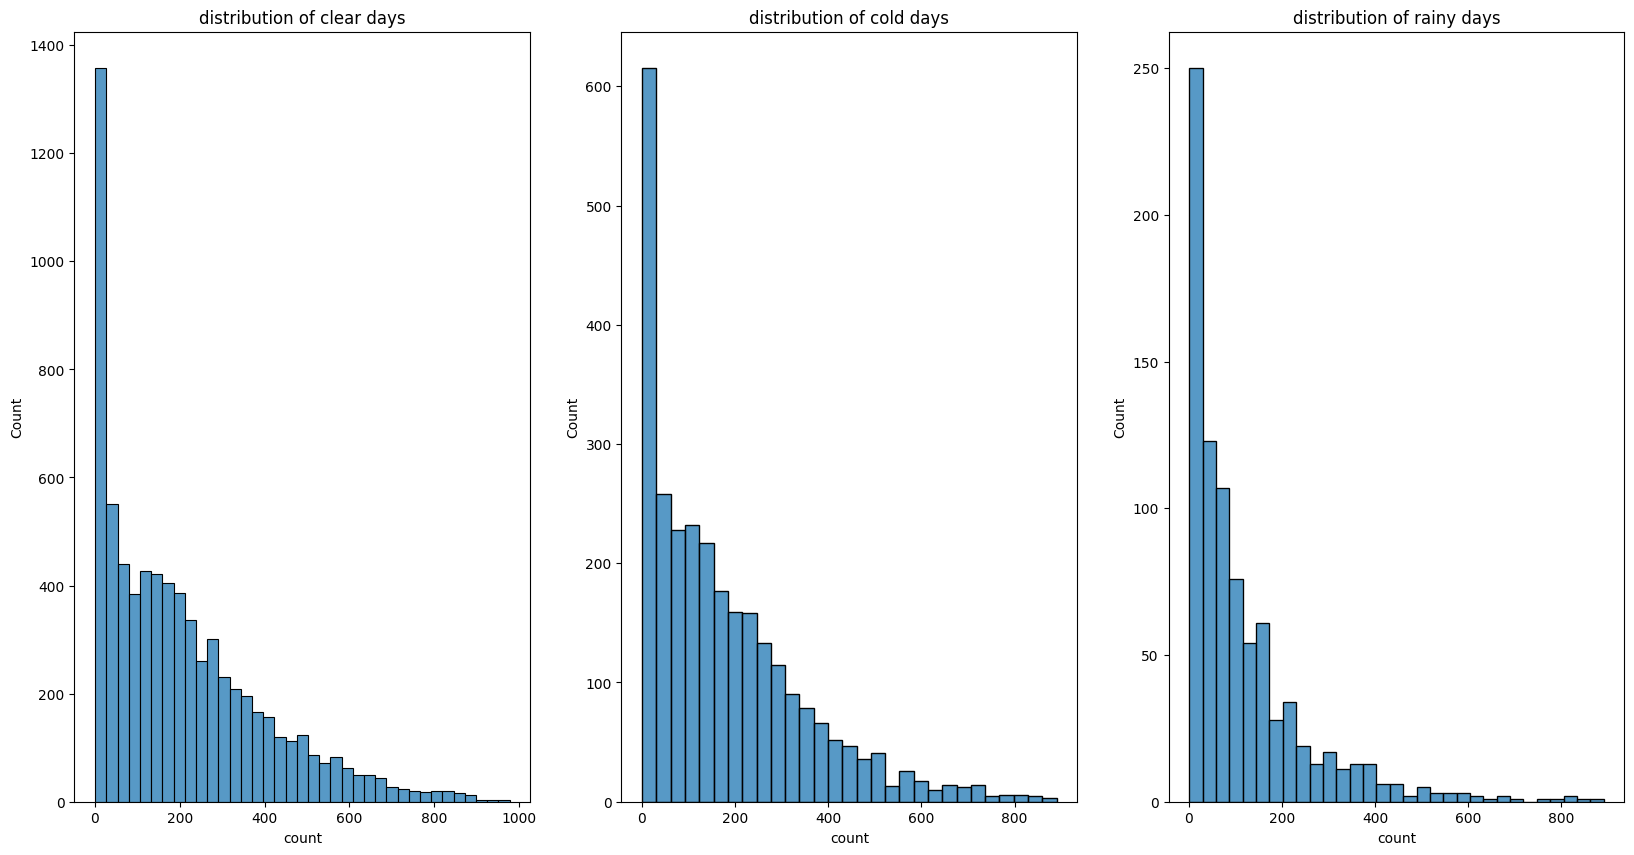

In [ ]:
# checking if the data follows gaussian or not

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
sns.histplot(clear_days)
plt.title("distribution of clear days")

plt.subplot(1, 3, 2)
sns.histplot(cold_days)
plt.title("distribution of cold days")

plt.subplot(1, 3, 3)
sns.histplot(rain_days)
plt.title("distribution of rainy days")

plt.show()

<Figure size 1500x500 with 0 Axes>

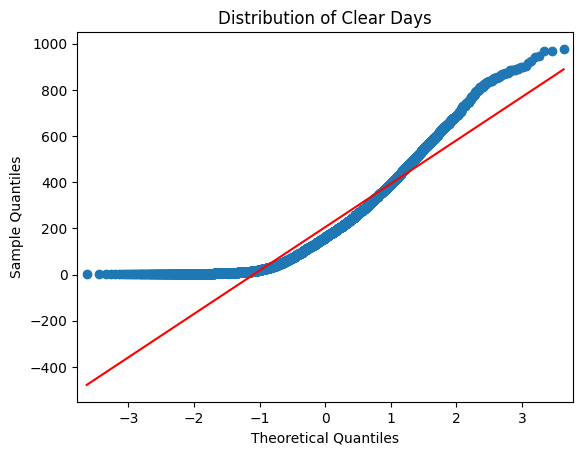

In [ ]:
#This clearly does not look Gaussian. Let's observe it's QQ Plot

from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(15, 5))

qqplot(clear_days, line="s")
plt.title("Distribution of Clear Days")


plt.show()


<Figure size 1500x500 with 0 Axes>

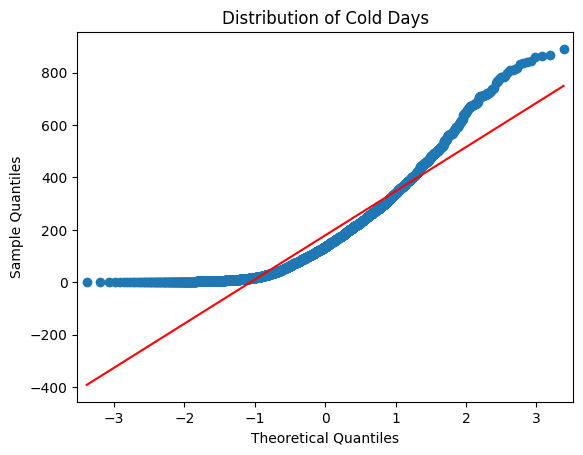

In [ ]:
plt.figure(figsize=(15, 5))

qqplot(cold_days, line="s")
plt.title("Distribution of Cold Days")


plt.show()


<Figure size 1500x500 with 0 Axes>

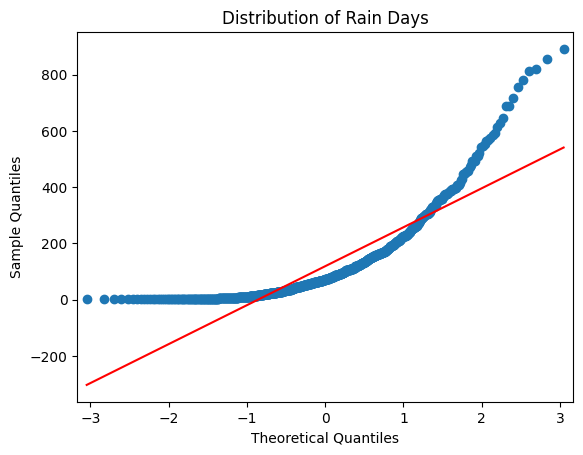

In [ ]:
plt.figure(figsize=(15, 5))

qqplot(rain_days, line="s")
plt.title("Distribution of Rain Days")


plt.show()

From the above plot,

- We can see that points deviate from the straight line and data does not follows the normal distribution.

In [ ]:
from scipy.stats import shapiro

# H0: Data is Gaussian
# Ha: Data is not Gaussian

clear_sample = clear_days.sample(1000)

test_stat, p_value = shapiro(clear_sample)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

2.040015409093727e-26
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian

test_stat, p_value = shapiro(cold_days)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

9.781063280987223e-43
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian

test_stat, p_value = shapiro(rain_days)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

3.876090133422781e-33
Reject H0
Data is not Gaussian


In [ ]:
# checking equality Variance

from scipy.stats import levene

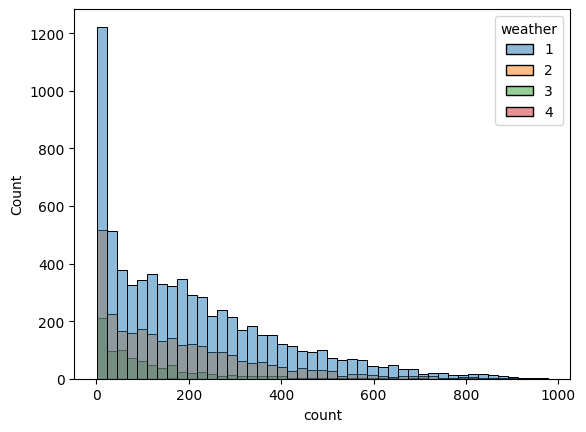

In [ ]:
sns.histplot(data=df, x="count", hue="weather",palette= 'tab10')

plt.show()

In [ ]:
clear_days.var()

35328.79846268022

In [ ]:
cold_days.var()

28347.248993301797

In [ ]:
rain_days.var()

19204.77589271419

In [ ]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(clear_days, cold_days,rain_days)

print('pvalue :', p_value)

if p_value < 0.05:
    print("Variances are not equal")


pvalue : 6.198278710731511e-36
Variances are not equal


From the assumptions of Anova test for different weather conditions,

1. The data for different weather conditions does **not** follows the **Noramal distributions** (from QQ-plot and Shapiro Wilks test)

2. The data also have **different Varaiance** for different weather conditions ( from Levene test).

3.Proceeded with **Kruskal Wallis** Test

In [ ]:
from scipy.stats import kruskal

statistic, p_value = kruskal(clear_days,cold_days,rain_days)

print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There are significant differences in demand for bicycles among different weather conditions.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in demand for bicycles among different weather conditions.")


Statistic: 204.95566833068537
P-value: 3.122066178659941e-45
Reject null hypothesis: There are significant differences in demand for bicycles among different weather conditions.


In [ ]:
# try with paried T test

t_stat, p_value = ttest_ind(clear_days, cold_days)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('There are significant differences in demand for bicycles among different weather conditions.')
else:
    print("Fail to reject H0")
    print('There are no significant differences in demand for bicycles among different weather conditions.')

p_value: 9.098916216508542e-11
Reject H0
There are significant differences in demand for bicycles among different weather conditions.


In [ ]:
t_stat, p_value = ttest_ind(clear_days, rain_days)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('There are significant differences in demand for bicycles among different weather conditions.')
else:
    print("Fail to reject H0")
    print('There are no significant differences in demand for bicycles among different weather conditions.')

p_value: 1.4918709771846276e-38
Reject H0
There are significant differences in demand for bicycles among different weather conditions.


In [ ]:
t_stat, p_value = ttest_ind(cold_days, rain_days)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('There are significant differences in demand for bicycles among different weather conditions.')
else:
    print("Fail to reject H0")
    print('There are no significant differences in demand for bicycles among different weather conditions.')

p_value: 2.7459673190273642e-21
Reject H0
There are significant differences in demand for bicycles among different weather conditions.


After checking with Anova test and assumptions of anova , the given data does not follows Gaussion Distribution.

After Kruskal Wallis test we can see that there are significant difference in demand for bicycles among different weather conditions.

In order to check if there is any equalance in weather conditions tried with independent T-test and there are significant difference in every weather conditions.

##Checking if the demand of bicycles on rent is the same for different Seasons?

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [ ]:
spring=df[df['season']==1]['count']
summer=df[df['season']==2]['count']
fall=df[df['season']==3]['count']
winter=df[df['season']==4]['count']

In [ ]:
np.mean(spring)

116.34326135517499

In [ ]:
np.mean(summer)

215.25137211855105

In [ ]:
np.mean(fall)

234.417124039517

In [ ]:
np.mean(winter)

198.98829553767374

In [ ]:
print('Number of riders in Spring Season :' , np.sum(spring))
print('Number of riders in Summer Season :' , np.sum(summer))
print('Number of riders in Fall Season :' , np.sum(fall))
print('Number of riders in Winter Season :' , np.sum(winter))

Number of riders in Spring Season : 312498
Number of riders in Summer Season : 588282
Number of riders in Fall Season : 640662
Number of riders in Winter Season : 544034


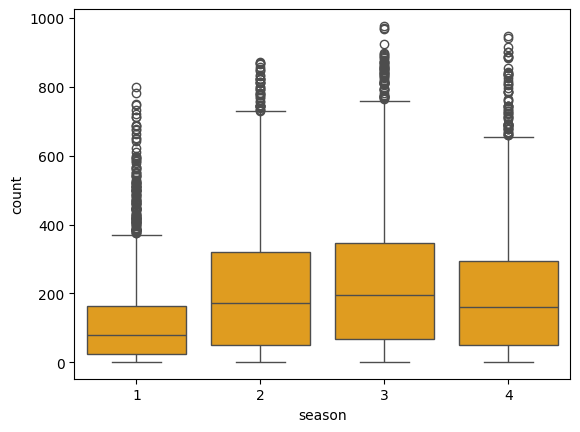

In [ ]:
#### Let's apply One-way ANOVA to see if there is a relation between `count` and `season' features

sns.boxplot(x='season', y='count', data=df, color='orange')

plt.show()

In [ ]:
#one way anova test

f_stats, p_value = f_oneway(spring, summer, fall, winter)

print("test statistic:",f_stats)
print("p_value:",p_value)

if p_value < 0.05:
    print("Reject null hypothesis: There are significant differences in demand for bicycles among different season.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in demand for bicycles among different seasons.")

test statistic: 236.94671081032106
p_value: 6.164843386499654e-149
Reject null hypothesis: There are significant differences in demand for bicycles among different season.


 ## Assumptions of Anova

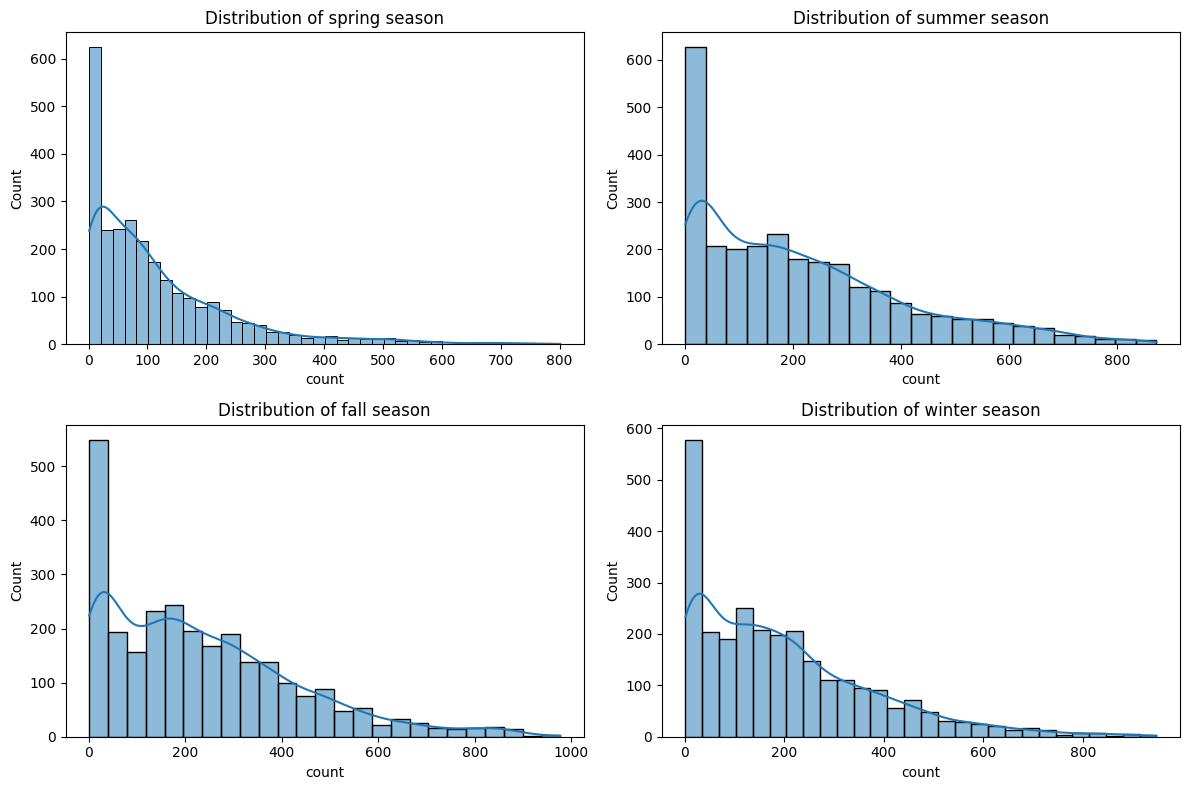

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(spring,kde=True)
plt.title("Distribution of spring season")

plt.subplot(2, 2, 2)
sns.histplot(summer,kde=True)
plt.title("Distribution of summer season")

plt.subplot(2, 2, 3)
sns.histplot(fall,kde=True)
plt.title("Distribution of fall season")

plt.subplot(2, 2, 4)
sns.histplot(winter,kde=True)
plt.title("Distribution of winter season")

plt.tight_layout()
plt.show()


<Figure size 1500x500 with 0 Axes>

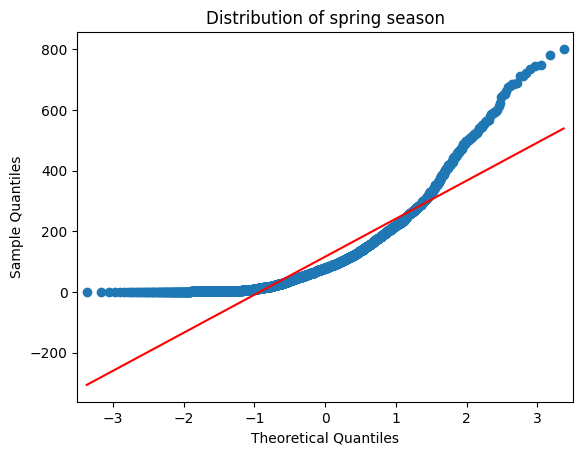

In [ ]:
#This clearly does not look Gaussian. Let's observe it's QQ Plot


plt.figure(figsize=(15, 5))

qqplot(spring, line="s")
plt.title("Distribution of spring season")


plt.show()

<Figure size 1500x500 with 0 Axes>

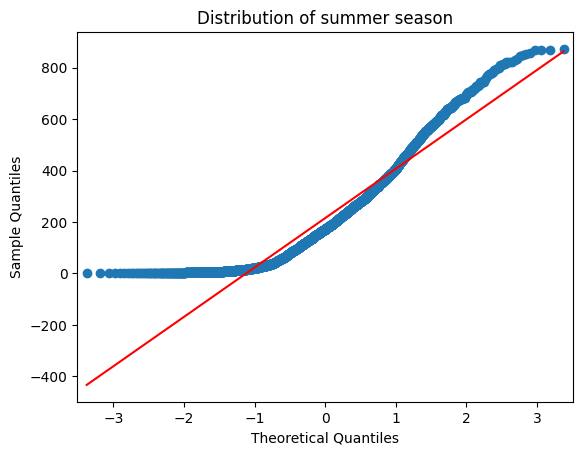

In [ ]:
plt.figure(figsize=(15, 5))

qqplot(summer, line="s")
plt.title("Distribution of summer season")


plt.show()

<Figure size 1500x500 with 0 Axes>

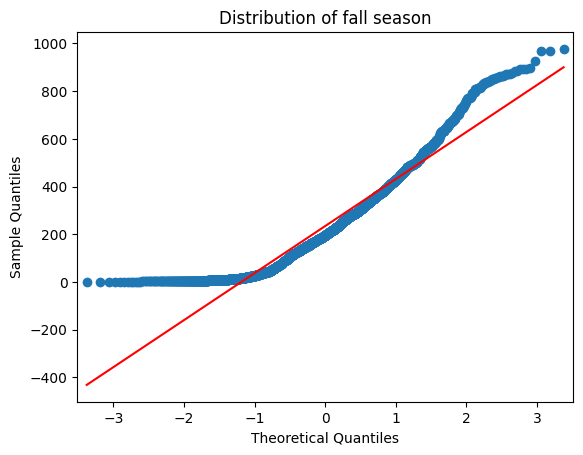

In [ ]:
plt.figure(figsize=(15, 5))

qqplot(fall, line="s")
plt.title("Distribution of fall season")


plt.show()

<Figure size 1500x500 with 0 Axes>

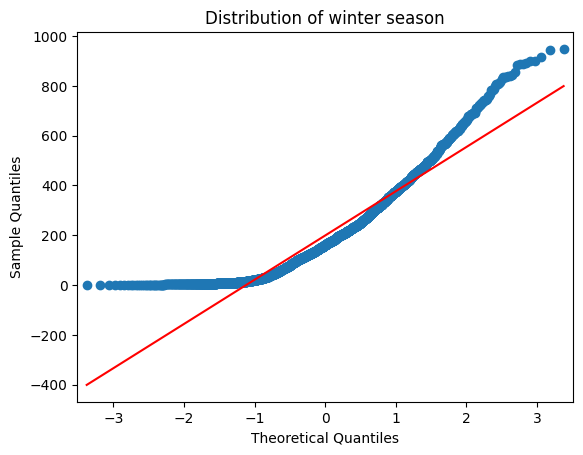

In [ ]:
plt.figure(figsize=(15, 5))

qqplot(winter, line="s")
plt.title("Distribution of winter season")


plt.show()

From the above plot,

- We can see that points deviate from the straight line and does not follows Gaussian distribution.

In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian

spring_sample=spring.sample(1500)

test_stat, p_value = shapiro(spring_sample)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

3.629340601825847e-39
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian

summer_sample=summer.sample(1500)

test_stat, p_value = shapiro(summer_sample)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

1.5548002348382774e-30
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian

fall_sample=fall.sample(1500)

test_stat, p_value = shapiro(fall_sample)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

2.22755055520145e-28
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian

winter_sample=winter.sample(1500)

test_stat, p_value = shapiro(winter_sample)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

5.700962155499309e-30
Reject H0
Data is not Gaussian


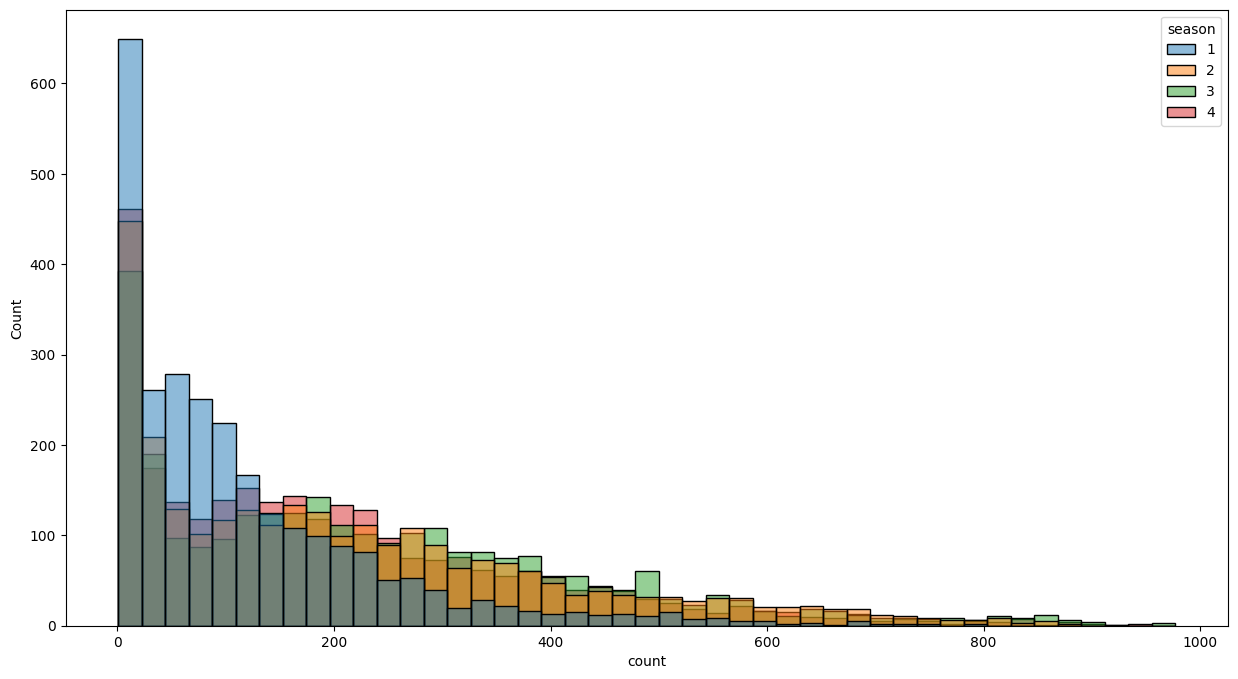

In [ ]:
# checking equality Variance

plt.figure(figsize=(15, 8))

sns.histplot(data=df, x="count", hue="season",palette= 'tab10')

plt.show()

In [ ]:
print('spring_variance:',spring.var())
print('summer_variance:',summer.var())
print('fall_variance:',fall.var())
print('winter_variance:',winter.var())

spring_variance: 15693.568533717144
summer_variance: 36867.01182553242
fall_variance: 38868.517012662865
winter_variance: 31549.720316669307


In [ ]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(spring, summer,fall, winter)

print('pvalue :', p_value)

if p_value < 0.05:
    print("Variances are not equal")

pvalue : 1.0147116860043298e-118
Variances are not equal


From the assumptions of Anova test for different Season conditions,

1. The data for different weather conditions does **not** follows the **Noramal distributions** (from QQ-plot and Shapiro Wilks test)

2. The data also have **different Varaiance** for different Season conditions ( from Levene test).

3.Proceeded with **Kruskal Wallis** Test

In [ ]:

statistic, p_value = kruskal(spring,summer,fall,winter)

print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There are significant differences in demand for bicycles among different seasons.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in demand for bicycles among different seasons.")

Statistic: 699.6668548181988
P-value: 2.479008372608633e-151
Reject null hypothesis: There are significant differences in demand for bicycles among different seasons.


In [ ]:
# try with paried T test

t_stat, p_value = ttest_ind(spring, summer)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('There are significant differences in demand for bicycles among different seasons.')
else:
    print("Fail to reject H0")
    print('There are no significant differences in demand for bicycles among different seasons.')

p_value: 1.6578587340400095e-106
Reject H0
There are significant differences in demand for bicycles among different seasons.


In [ ]:
t_stat, p_value = ttest_ind(spring, fall)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('There are significant differences in demand for bicycles among different seasons.')
else:
    print("Fail to reject H0")
    print('There are no significant differences in demand for bicycles among different seasons.')

p_value: 3.403850435531097e-143
Reject H0
There are significant differences in demand for bicycles among different seasons.


In [ ]:
t_stat, p_value = ttest_ind(spring, winter)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('There are significant differences in demand for bicycles among different seasons.')
else:
    print("Fail to reject H0")
    print('There are no significant differences in demand for bicycles among different seasons.')

p_value: 5.236417429066782e-84
Reject H0
There are significant differences in demand for bicycles among different seasons.


In [ ]:
t_stat, p_value = ttest_ind(summer, fall)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('There are significant differences in demand for bicycles among different seasons.')
else:
    print("Fail to reject H0")
    print('There are no significant differences in demand for bicycles among different seasons.')

p_value: 0.00027431561172498644
Reject H0
There are significant differences in demand for bicycles among different seasons.


In [ ]:
t_stat, p_value = ttest_ind(summer, winter)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('There are significant differences in demand for bicycles among different seasons.')
else:
    print("Fail to reject H0")
    print('There are no significant differences in demand for bicycles among different seasons.')

p_value: 0.001157968169413171
Reject H0
There are significant differences in demand for bicycles among different seasons.


In [ ]:
t_stat, p_value = ttest_ind(fall, winter)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('There are significant differences in demand for bicycles among different seasons.')
else:
    print("Fail to reject H0")
    print('There are no significant differences in demand for bicycles among different seasons.')

p_value: 3.294359667247495e-12
Reject H0
There are significant differences in demand for bicycles among different seasons.


After checking with Anova test and assumptions of anova , the given data does not follows Gaussion Distribution.

After Kruskal Wallis test we can see that there are significant difference in demand for bicycles among different Seasons.

In order to check if there is any equalance in weather conditions tried with independent T-test and there are significant difference in every season.

##Checking if the Weather conditions are significantly different during different Seasons?

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


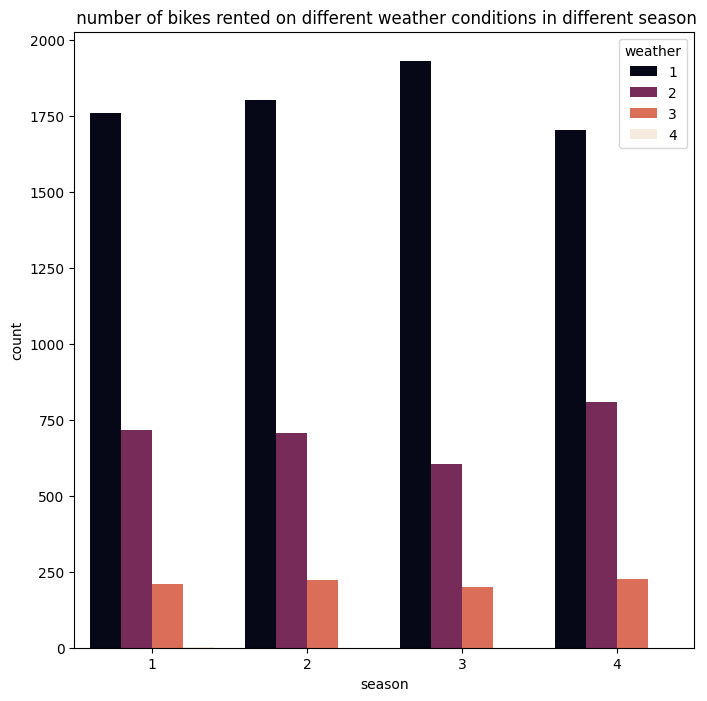

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df,x='season',hue='weather',palette='rocket')
plt.title(" number of bikes rented on different weather conditions in different season")

plt.show()

In [ ]:
contingency_table = pd.crosstab(df['weather'], df['season'])
print(contingency_table)

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0


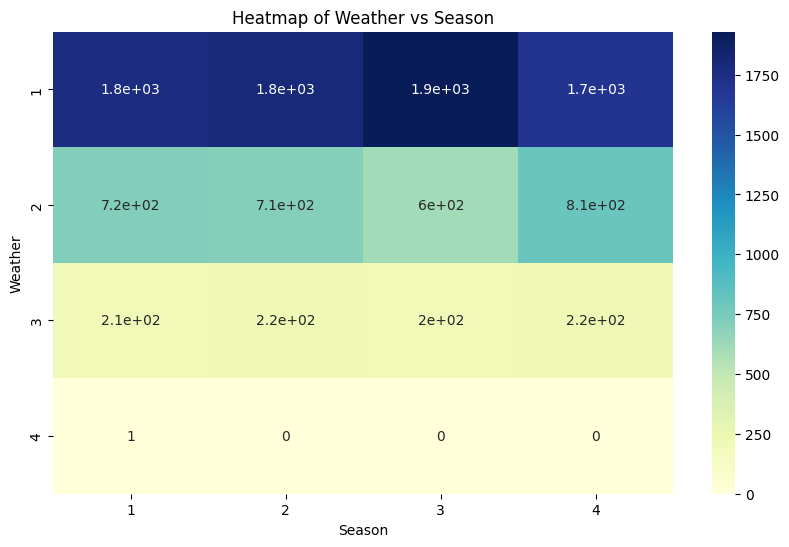

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, cmap='YlGnBu', annot =True)
plt.title('Heatmap of Weather vs Season')
plt.xlabel('Season')
plt.ylabel('Weather')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

chi_stat, p_value, df, exp_freq = chi2_contingency(contingency_table)
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 49.15865559689363
p_value: 1.5499250736864862e-07
df: 9
exp_freq: [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [ ]:
alpha = 0.05

if p_value <= alpha:
    print("\nReject null hypothesis: There is a significant difference between Weather and Season.")
else:
    print("\nFail to reject null hypothesis: There is no significant differnce between Weather and Season.")


Reject null hypothesis: There is a significant difference between Weather and Season.


Using Chi2-Contingency Test we can see that there is a significant difference in rides for diffrent weather conditions a=in different Seasons.

#Recommendations and Insights

1. The Bikes rented by te **registered customers** are in high correalation with the count  (number of bikes rented).

2. Introducing new offers and features such as first 2 rides are completely free can increase the number of customers to reigster.

3. Typically when weather is clear we have most number of rides, but when weather condition is slightly bad we have lesser number of rides.

Total number of rides in **Clear days (1) : 1476063**

Total number of rides in **Cold days (2) : 507160**

Total number of rides in **rain days (3)  : 102089**

Total number of rides in **heavy rain days (4) : 164**

4. From given data we can see that ,

Total number of rides in **weekdays** : **654872**

Total number of rides in **weekends** : **1430604**

5. Number of riders in **Spring Season : 312498**

   Number of riders in **Summer Season : 588282**

   Number of riders in **Fall Season : 640662**

   Number of riders in **Winter Season : 544034**